## DAY 1

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
# libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pd.options.display.max_columns=200
#pd.options.display.max_rows=200

In [4]:
# DATASET
'''
BALANCE : Balance amount left in customers account to make purchases
• BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1
• PURCHASES : Amount of purchases made from account
• PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1
• ONEOFF_PURCHASES : Maximum purchase amount done in one-go
• ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
• INSTALLMENTS_PURCHASES : Amount of purchase done in installment
• CASH_ADVANCE : Cash in advance given by the user
• PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
• CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
• CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
• PURCHASES_TRX : Numbe of purchase transactions made
• CREDIT_LIMIT : Limit of Credit Card for user
• PAYMENTS : Amount of Payment done by user
• MINIMUM_PAYMENTS : Minimum amount of payments made by user
• PRCFULLPAYMENT : Percent of full payment paid by user
• TENURE : Tenure of credit card service for user
'''

'\nBALANCE : Balance amount left in customers account to make purchases\n• BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1\n• PURCHASES : Amount of purchases made from account\n• PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1\n• ONEOFF_PURCHASES : Maximum purchase amount done in one-go\n• ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go\n• INSTALLMENTS_PURCHASES : Amount of purchase done in installment\n• CASH_ADVANCE : Cash in advance given by the user\n• PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done\n• CASHADVANCEFREQUENCY : How frequently the cash in advance being paid\n• CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"\n• PURCHASES_TRX : Numbe of purchase transactions made\n• CREDIT_LIMIT : Limit of Credit Card for user\n• PAYMENTS : Amount of Payment done by user\n• MINIMUM_PAYMENTS : Minimum amount of payments made by

In [5]:
# loading the dataset
cc=pd.read_csv("data_credit_card_customer_seg.csv")
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# shape
cc.shape

(8950, 18)

In [7]:
# mathematical features
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# null values
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# % of null values
round(cc.isnull().sum()*100/len(cc),4)

CUST_ID                             0.0000
BALANCE                             0.0000
BALANCE_FREQUENCY                   0.0000
PURCHASES                           0.0000
ONEOFF_PURCHASES                    0.0000
INSTALLMENTS_PURCHASES              0.0000
CASH_ADVANCE                        0.0000
PURCHASES_FREQUENCY                 0.0000
ONEOFF_PURCHASES_FREQUENCY          0.0000
PURCHASES_INSTALLMENTS_FREQUENCY    0.0000
CASH_ADVANCE_FREQUENCY              0.0000
CASH_ADVANCE_TRX                    0.0000
PURCHASES_TRX                       0.0000
CREDIT_LIMIT                        0.0112
PAYMENTS                            0.0000
MINIMUM_PAYMENTS                    3.4972
PRC_FULL_PAYMENT                    0.0000
TENURE                              0.0000
dtype: float64

In [10]:
# column information
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
# checking for columns with null values
cc.loc[:, cc.isnull().any()]

,CREDIT_LIMIT,MINIMUM_PAYMENTS
0,1000.0,139.509787
1,7000.0,1072.340217
2,7500.0,627.284787
3,7500.0,NaN
4,1200.0,244.791237
...,...,...
8945,1000.0,48.886365
8946,1000.0,NaN
8947,1000.0,82.418369
8948,500.0,55.755628


## DAY 2

In [12]:
#df.dropna(subset=['Name'])

cc=cc.dropna(subset=["CREDIT_LIMIT"])

# dropping the one row of null value.

In [13]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
# we see that there are columns where "MINIMUM_PAYMENTS"=null but PAYMENTS has some value
# so we assume that the customers with null min_payment have not pais, so converting the values to zero.

In [15]:
#df1 = df[df.isna().any(axis=1)]
ccnull=cc[cc.isna().any(axis=1)]

In [16]:
ccnull[ccnull["MINIMUM_PAYMENTS"].isnull() & ccnull["PAYMENTS"]!=0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
54,C10056,6.660517,0.636364,310.00,0.00,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
99,C10104,0.000000,0.000000,0.00,0.00,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
146,C10152,19.354559,0.909091,689.70,0.00,689.70,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,10000.0,746.691026,NaN,0.0,12
319,C10330,0.478714,0.090909,734.97,159.00,575.97,0.000000,0.833333,0.083333,0.750000,0.000000,0,16,6000.0,1159.135064,NaN,0.0,12
1155,C11198,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,29272.486070,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,C18794,3.229304,0.545455,190.20,0.00,190.20,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1500.0,295.937124,NaN,0.0,12
8593,C18827,16.887571,0.363636,1083.00,1083.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
8647,C18882,0.006651,0.142857,0.00,0.00,0.00,164.137866,0.000000,0.000000,0.000000,0.142857,1,0,1200.0,5.070726,NaN,0.0,7
8753,C18992,0.223351,0.090909,336.00,0.00,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.0,12


In [17]:
# we see that 

In [18]:
cc["MINIMUM_PAYMENTS"]=cc["MINIMUM_PAYMENTS"].fillna(0)

In [19]:
# now we do not have any null values.
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
# inspecting only monetory columns
cc[["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"]]

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,0.00,95.40,0.000000,1000.0,201.802084,139.509787
1,3202.467416,0.00,0.00,0.00,6442.945483,7000.0,4103.032597,1072.340217
2,2495.148862,773.17,773.17,0.00,0.000000,7500.0,622.066742,627.284787
3,1666.670542,1499.00,1499.00,0.00,205.788017,7500.0,0.000000,0.000000
4,817.714335,16.00,16.00,0.00,0.000000,1200.0,678.334763,244.791237
...,...,...,...,...,...,...,...,...
8945,28.493517,291.12,0.00,291.12,0.000000,1000.0,325.594462,48.886365
8946,19.183215,300.00,0.00,300.00,0.000000,1000.0,275.861322,0.000000
8947,23.398673,144.40,0.00,144.40,0.000000,1000.0,81.270775,82.418369
8948,13.457564,0.00,0.00,0.00,36.558778,500.0,52.549959,55.755628


In [21]:
cc[["PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,95.40,0.00,95.4
1,0.00,0.00,0.0
2,773.17,773.17,0.0
3,1499.00,1499.00,0.0
4,16.00,16.00,0.0


In [22]:
# we see that PURCHASES=ONEOFF_PURCHASES+INSTALLMENTS_PURCHASES
# since custering involves grouping of similar attributes we can delete 
#ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES

In [23]:
# dropping the columns
cc1=cc.drop(["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"],axis=1)

In [24]:
# inspecting only the frequrncy columns
cc[["BALANCE_FREQUENCY","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY",]].head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,0.818182,0.166667,0.000000,0.083333,0.000000
1,0.909091,0.000000,0.000000,0.000000,0.250000
2,1.000000,1.000000,1.000000,0.000000,0.000000
3,0.636364,0.083333,0.083333,0.000000,0.083333
4,1.000000,0.083333,0.083333,0.000000,0.000000


In [25]:
# inspecting the data set with below condition.
cc[cc["CASH_ADVANCE"]!=0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
14,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12
16,C10017,2072.074354,0.875000,0.00,0.00,0.00,2784.274703,0.000000,0.000000,0.000000,0.250000,3,0,3000.0,391.974562,376.579631,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8938,C19179,78.818407,0.500000,0.00,0.00,0.00,1113.186078,0.000000,0.000000,0.000000,0.166667,7,0,1200.0,1397.770131,21.821194,0.333333,6
8939,C19180,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.000000,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.000000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [26]:
# inspecting the data set with below condition
cc[cc["PURCHASES_TRX"]==12]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.000000,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.000000,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.000000,12
19,C10020,3577.970933,1.000000,398.64,0.00,398.64,0.0,1.000000,0.000000,1.000000,0.0,0,12,4000.0,1053.980464,12465.549380,0.000000,12
25,C10026,169.781679,1.000000,399.60,0.00,399.60,0.0,1.000000,0.000000,1.000000,0.0,0,12,3000.0,215.306142,163.005536,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,C19003,708.315197,1.000000,2252.32,452.32,1800.00,0.0,0.818182,0.181818,0.727273,0.0,0,12,2500.0,2155.891761,208.895886,0.100000,11
8766,C19005,15.529084,0.909091,294.98,0.00,294.98,0.0,1.000000,0.000000,0.909091,0.0,0,12,1500.0,293.826005,46.022249,0.250000,11
8788,C19027,133.099445,1.000000,1170.00,0.00,1170.00,0.0,1.000000,0.000000,0.900000,0.0,0,12,1000.0,1068.502534,161.816503,0.444444,10
8794,C19034,59.101573,1.000000,786.00,0.00,786.00,0.0,1.000000,0.000000,0.900000,0.0,0,12,1000.0,664.059770,144.687135,1.000000,10


In [27]:
# these are the people, who pay with EMI.

In [28]:
cc1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## DAY 3

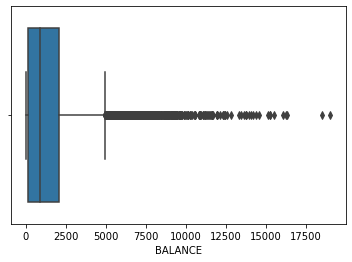

In [29]:
sns.boxplot(cc1['BALANCE'])
plt.show()

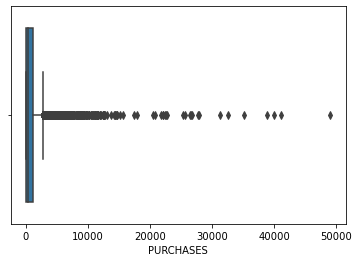

In [30]:
sns.boxplot(cc1['PURCHASES'])
plt.show()

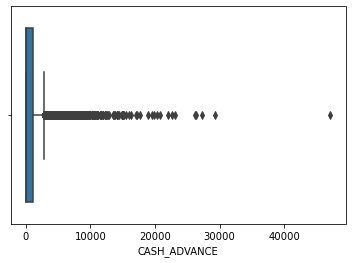

In [31]:
sns.boxplot(cc1['CASH_ADVANCE'])
plt.show()

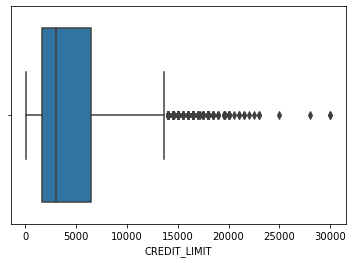

In [32]:
sns.boxplot(cc1['CREDIT_LIMIT']) 
plt.show()

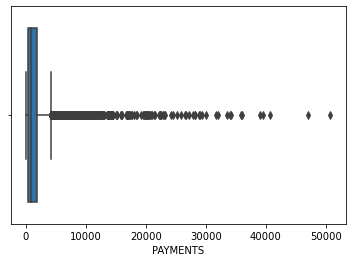

In [33]:
sns.boxplot(cc1['PAYMENTS'])  
plt.show()

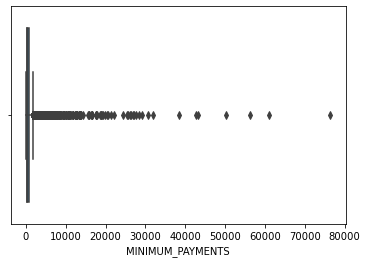

In [34]:
sns.boxplot(cc1['MINIMUM_PAYMENTS'])  

plt.show()

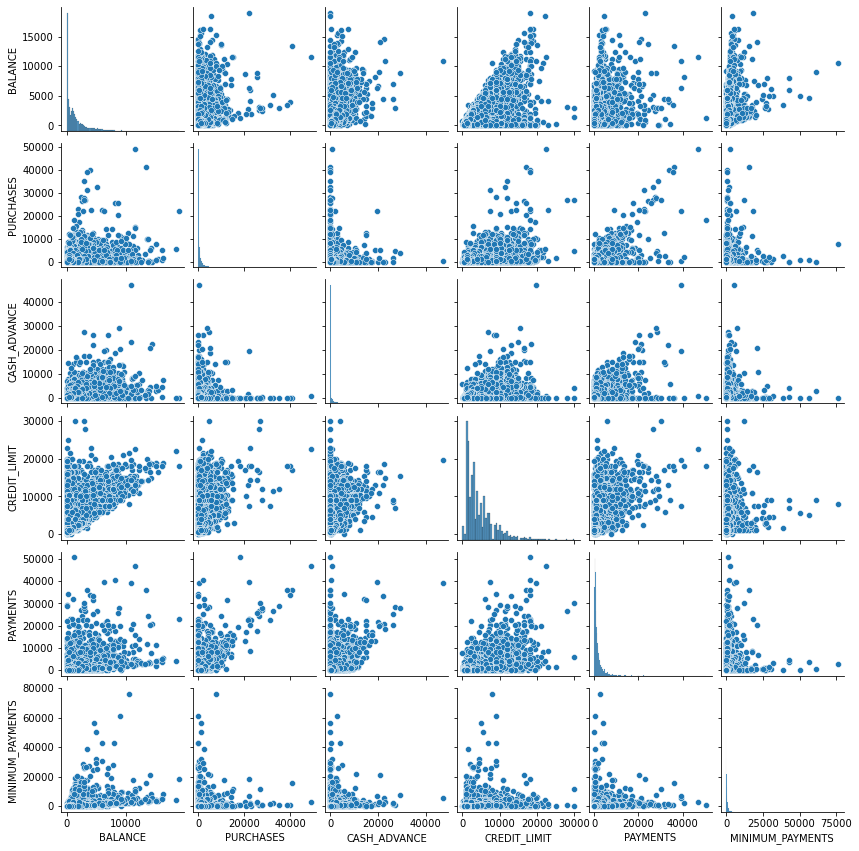

In [35]:
sns.pairplot(data=cc1, vars=["BALANCE","PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"], size=2)
plt.show()

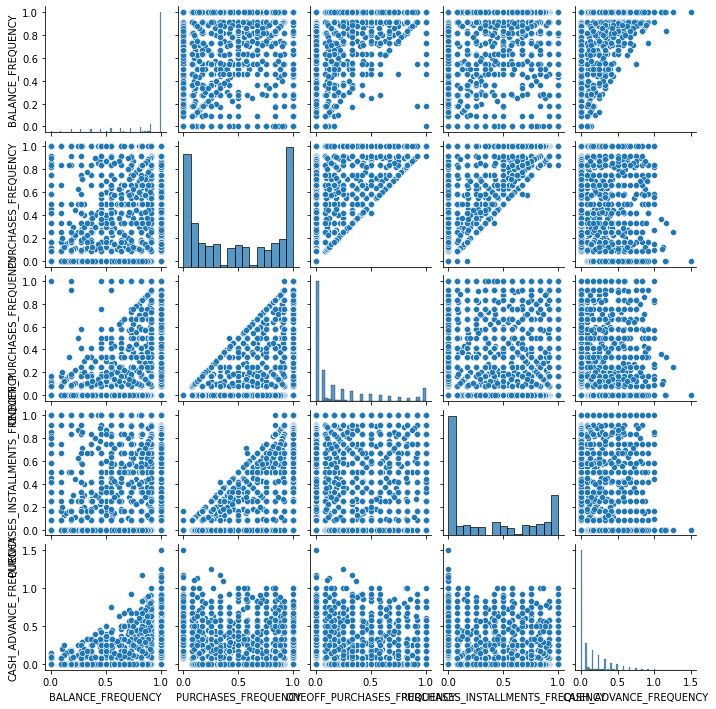

In [36]:
sns.pairplot(data=cc1, vars=["BALANCE_FREQUENCY","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY"], size=2)
plt.show()

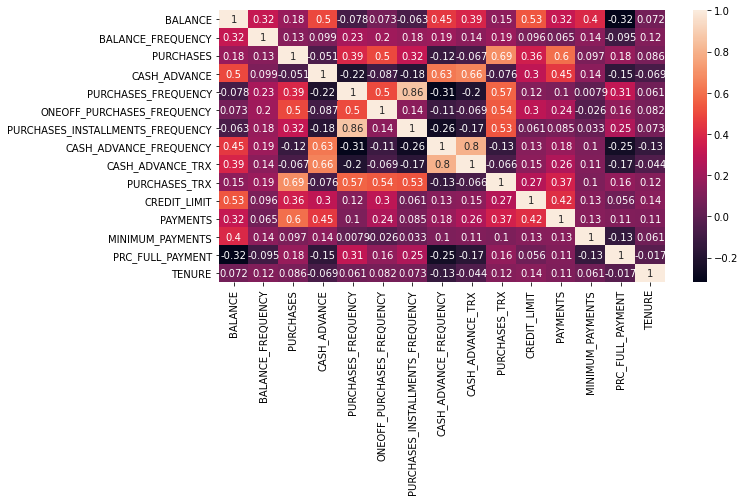

In [37]:
# Let's see the correlation matrix using the heatmap

plt.figure(figsize = (10,5))        # Size of the figure
sns.heatmap(cc1.corr(),annot = True)
plt.show()

Text(0, 0.5, 'count')

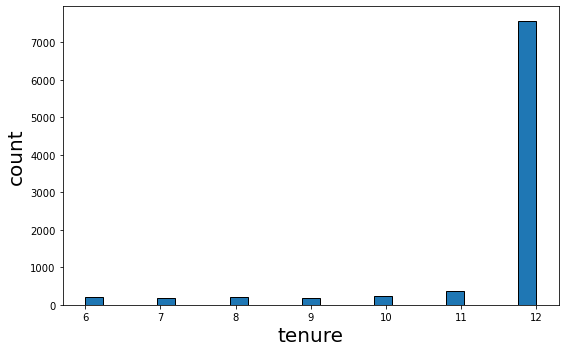

In [38]:
plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(cc1['TENURE'], edgecolor = 'k', bins = 25)
plt.xlabel("tenure", fontsize=20)
plt.ylabel("count", fontsize=20)


In [39]:
'''plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(cc1['YEARS_BIRTH'], edgecolor = 'k', bins = 25)
plt.xlabel("age", fontsize=20)
plt.ylabel("count", fontsize=20)
'''


'plt.figure(figsize = (15,5),tight_layout = True)\nplt.subplot(1,2,1)\nplt.hist(cc1[\'YEARS_BIRTH\'], edgecolor = \'k\', bins = 25)\nplt.xlabel("age", fontsize=20)\nplt.ylabel("count", fontsize=20)\n'

In [40]:
'''
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x ='CREDIT_LIMIT',data = cc1, hue='TENURE')
'''

"\nplt.figure(figsize = (20,10))\nplt.subplot(1,2,1)\nsns.countplot(x ='CREDIT_LIMIT',data = cc1, hue='TENURE')\n"

In [41]:
cc1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Text(0, 0.5, 'count')

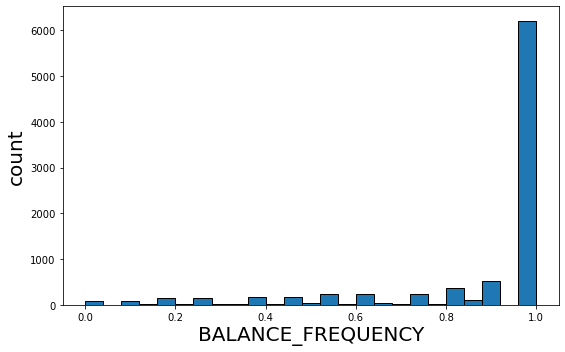

In [42]:
plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(cc1['BALANCE_FREQUENCY'], edgecolor = 'k', bins = 25)
plt.xlabel("BALANCE_FREQUENCY", fontsize=20)
plt.ylabel("count", fontsize=20)


Text(0, 0.5, 'count')

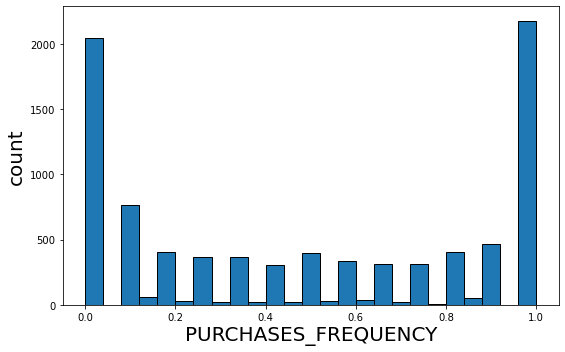

In [43]:
plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(cc1['PURCHASES_FREQUENCY'], edgecolor = 'k', bins = 25)
plt.xlabel("PURCHASES_FREQUENCY", fontsize=20)
plt.ylabel("count", fontsize=20)


Text(0, 0.5, 'count')

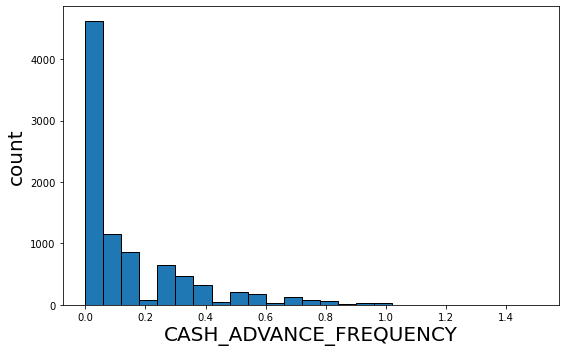

In [44]:


plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(cc1['CASH_ADVANCE_FREQUENCY'], edgecolor = 'k', bins = 25)
plt.xlabel("CASH_ADVANCE_FREQUENCY", fontsize=20)
plt.ylabel("count", fontsize=20)


In [45]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Text(0, 0.5, 'count')

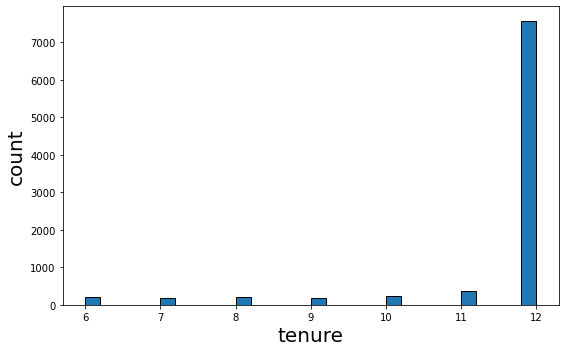

In [46]:
# Analysing the tenure column
plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(cc1['TENURE'], edgecolor = 'k', bins = 30)
plt.xlabel("tenure", fontsize=20)
plt.ylabel("count", fontsize=20)


## DAY 4

In [50]:
# bins defines as 6-8,8-10,10-11,12 months.
bins=[6,8,10,11,12]
group_names=["6-8","8-10","10-11","12"]

cc1["TENURE_RANGE"]=pd.cut(cc1['TENURE'], bins, labels=group_names)

In [53]:
cc1.head(50)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TENURE_RANGE
0,C10001,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,12
1,C10002,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,12
2,C10003,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,12
3,C10004,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,12
4,C10005,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,12
5,C10006,1809.828751,1.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,12
6,C10007,627.260806,1.000000,7091.01,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,12
7,C10008,1823.652743,1.000000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,12
8,C10009,1014.926473,1.000000,861.49,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,12
9,C10010,152.225975,0.545455,1281.60,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,12


In [54]:
cc1.dtypes

CUST_ID                               object
BALANCE                              float64
BALANCE_FREQUENCY                    float64
PURCHASES                            float64
CASH_ADVANCE                         float64
PURCHASES_FREQUENCY                  float64
ONEOFF_PURCHASES_FREQUENCY           float64
PURCHASES_INSTALLMENTS_FREQUENCY     float64
CASH_ADVANCE_FREQUENCY               float64
CASH_ADVANCE_TRX                       int64
PURCHASES_TRX                          int64
CREDIT_LIMIT                         float64
PAYMENTS                             float64
MINIMUM_PAYMENTS                     float64
PRC_FULL_PAYMENT                     float64
TENURE                                 int64
TENURE_RANGE                        category
dtype: object

In [ ]:
#cc1["TENURE_RANGE"] = cc1["TENURE_RANGE"].astype('str')

<AxesSubplot:xlabel='TENURE_RANGE', ylabel='CASH_ADVANCE'>

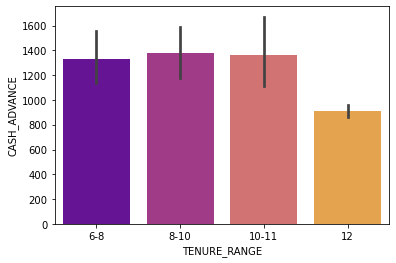

In [55]:
#sns.catplot(x="day", y="total_bill", hue="GENDER", kind="swarm", data=tips)

#sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
#sns.barplot(x ='sex', y ='total_bill', data = df, palette ='plasma')
 
sns.barplot(x="TENURE_RANGE", y="CASH_ADVANCE", data=cc1, palette="plasma")

In [ ]:
# people bw 6-11 months have taken mostly cash advances.

In [57]:
cc1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TENURE_RANGE
0,C10001,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,12
1,C10002,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,12
2,C10003,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,12
3,C10004,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,12
4,C10005,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,12


<AxesSubplot:xlabel='TENURE_RANGE', ylabel='CREDIT_LIMIT'>

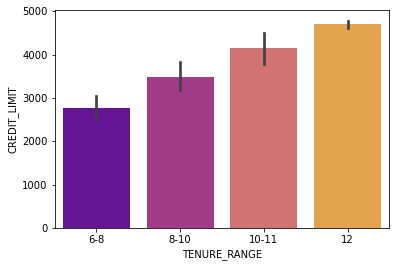

In [58]:
sns.barplot(x="TENURE_RANGE", y="CREDIT_LIMIT", data=cc1, palette="plasma")

In [ ]:
# higher is the tenure, higher is the credit limit

In [60]:
len(cc1['CREDIT_LIMIT'].value_counts(normalize=True))

205

<AxesSubplot:xlabel='TENURE_RANGE', ylabel='PAYMENTS'>

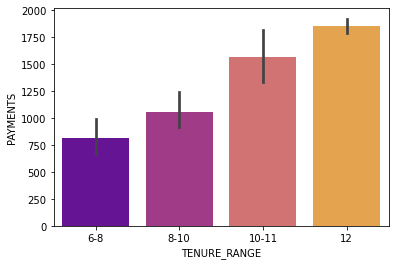

In [61]:
sns.barplot(x="TENURE_RANGE", y="PAYMENTS", data=cc1, palette="plasma")

In [ ]:
# higher the tenure higher the payments made

In [64]:
#sns.barplot(x="PAYMENTS", y="CREDIT_LIMIT", data=cc1, palette="plasma")

Text(0, 0.5, 'count')

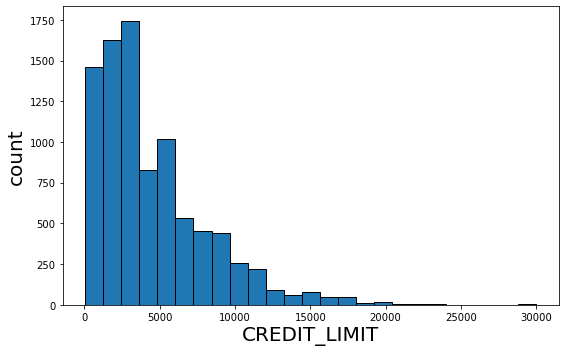

In [66]:
# inspecting credit limit for binning
plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(cc1['CREDIT_LIMIT'], edgecolor = 'k', bins = 25)
plt.xlabel('CREDIT_LIMIT', fontsize=20)
plt.ylabel("count", fontsize=20)


In [68]:
bins1=[0,5000,10000,15000,20000,30000]
group_names1=["0-5k","5k-10k","10k-15k","15k-20k","20k-30k"]

cc1["CREDIT_LIMIT_RANGE"]=pd.cut(cc1['CREDIT_LIMIT'], bins1, labels=group_names1)

In [69]:
cc1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TENURE_RANGE,CREDIT_LIMIT_RANGE
0,C10001,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,12,0-5k
1,C10002,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,12,5k-10k
2,C10003,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,12,5k-10k
3,C10004,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,12,5k-10k
4,C10005,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,12,0-5k


In [73]:
#sns.barplot(x="CREDIT_LIMIT_RANGE", y="PAYMENTS", data=cc1, palette="plasma")

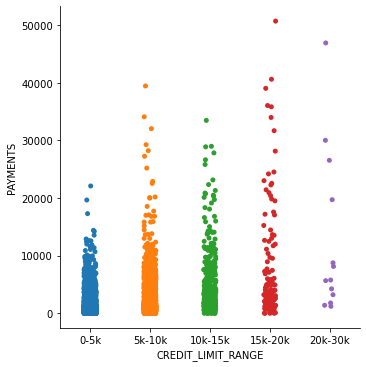

In [72]:
# sns.catplot(x="day", y="total_bill", data=tips)
sns.catplot(x="CREDIT_LIMIT_RANGE", y="PAYMENTS", data=cc1)

In [ ]:
# Significant peple from 0-15k have made the payments, there is significant decrease in 15-20k 
# and the least in 20-30k


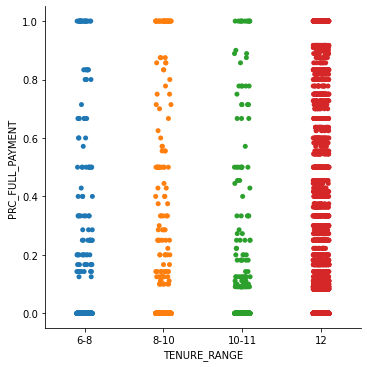

In [74]:
sns.catplot(x="TENURE_RANGE", y="PRC_FULL_PAYMENT", data=cc1)

In [ ]:
# A lot of people with 12 months tenure, are paying, compared to other tenures.

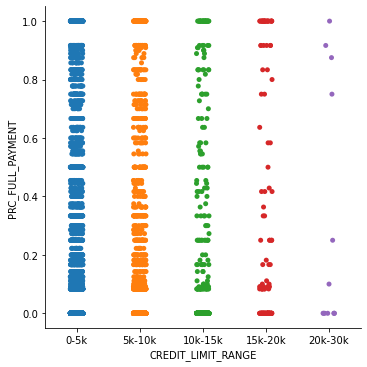

In [75]:
sns.catplot(x="CREDIT_LIMIT_RANGE", y="PRC_FULL_PAYMENT", data=cc1)

In [ ]:
# cust bw 0-10k are paying regularly, compared to other credit ranges.

#### people with credit limit bw 0-10k, and tenure of 12 months, are more comfortable in paying.

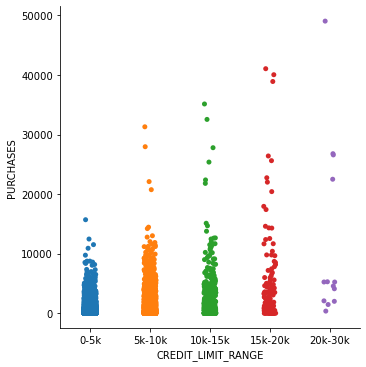

In [77]:
sns.catplot(x="CREDIT_LIMIT_RANGE", y="PURCHASES", data=cc1)

In [ ]:
# customers bw 0-5k & 5k-10k credit have purchases beyond their limit. Compared to others.


### customers with credit limit from 0-10k have a tendency to go befond their limit.

Text(0, 0.5, 'count')

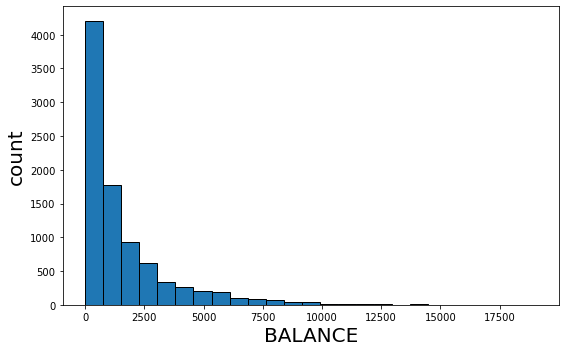

In [76]:
# inspecting the BALANCE feature.
plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(cc1['BALANCE'], edgecolor = 'k', bins = 25)
plt.xlabel("BALANCE", fontsize=20)
plt.ylabel("count", fontsize=20)


In [ ]:
# Since there is a tendency to go beyond the credit limit, analysing such customers.

In [78]:
cc1[["PURCHASES","CREDIT_LIMIT"]]

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0
...,...,...
8945,291.12,1000.0
8946,300.00,1000.0
8947,144.40,1000.0
8948,0.00,500.0


In [ ]:
'''
if df['crnn_pred']==df['manual_raw_value']:
    df['bin_crnn']=1
else:
    df['bin_crnn']=0

In [80]:
''''
if cc1["PURCHASES"]>cc1["CREDIT_LIMIT"]:
    cc1["LIMIT_STATUS"]="CROSSED"
else:
    cc1["LIMIT_STATUS"]="NOT_CROSSED"


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-80-e6fcd1cc9c79>, line 5)

In [ ]:
'''
import numpy as np
df['test'] = np.where(df['crnn_pred']==df['manual_raw_value'], 1, 0)

In [90]:
cc1["CREDIT_STATUS"]=np.where(cc1["PURCHASES"]>cc1["CREDIT_LIMIT"],"CROSSED","NOT_CROSSED")

In [91]:
cc1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TENURE_RANGE,CREDIT_LIMIT_RANGE,LIMIT_STATUS,CREDIT_STATUS
0,C10001,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,12,0-5k,NOT_CROSSED,NOT_CROSSED
1,C10002,3202.467416,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,12,5k-10k,NOT_CROSSED,NOT_CROSSED
2,C10003,2495.148862,1.000000,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,12,5k-10k,NOT_CROSSED,NOT_CROSSED
3,C10004,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,12,5k-10k,NOT_CROSSED,NOT_CROSSED
4,C10005,817.714335,1.000000,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,12,0-5k,NOT_CROSSED,NOT_CROSSED


In [97]:
cc1[["PURCHASES","CREDIT_LIMIT",'CREDIT_STATUS']]

,PURCHASES,CREDIT_LIMIT,CREDIT_STATUS
0,95.40,1000.0,NOT_CROSSED
1,0.00,7000.0,NOT_CROSSED
2,773.17,7500.0,NOT_CROSSED
3,1499.00,7500.0,NOT_CROSSED
4,16.00,1200.0,NOT_CROSSED
...,...,...,...
8945,291.12,1000.0,NOT_CROSSED
8946,300.00,1000.0,NOT_CROSSED
8947,144.40,1000.0,NOT_CROSSED
8948,0.00,500.0,NOT_CROSSED


Text(0, 0.5, 'count')

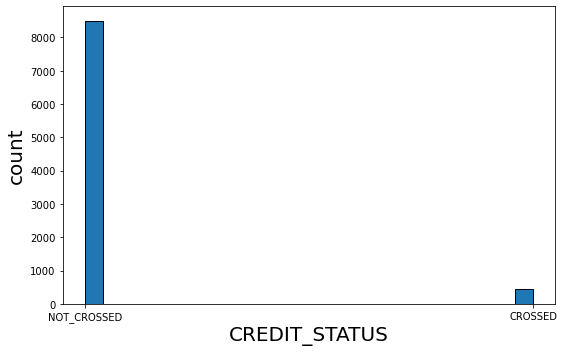

In [92]:
plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(cc1['CREDIT_STATUS'], edgecolor = 'k', bins = 25)
plt.xlabel('CREDIT_STATUS', fontsize=20)
plt.ylabel("count", fontsize=20)

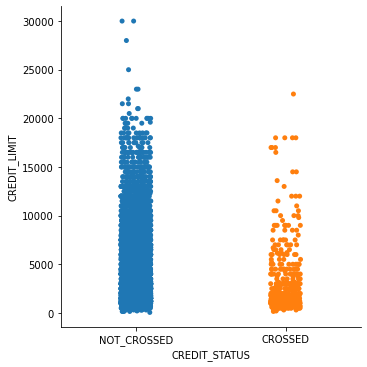

In [94]:
sns.catplot(x="CREDIT_STATUS", y="CREDIT_LIMIT", data=cc1)

In [95]:
#cust bw 0-5k mostly and upto 20k are over purchasing

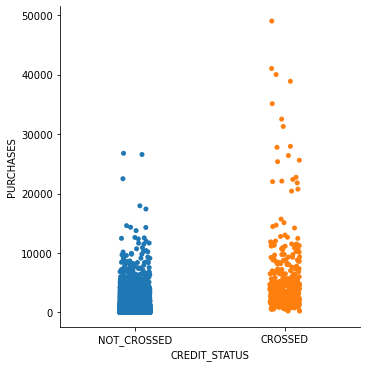

In [98]:
sns.catplot(x="CREDIT_STATUS", y="PURCHASES", data=cc1)

In [99]:
# mostly lie bw 0-10k and rise upto 40k.


### look out for customers with purchases from 0-10k

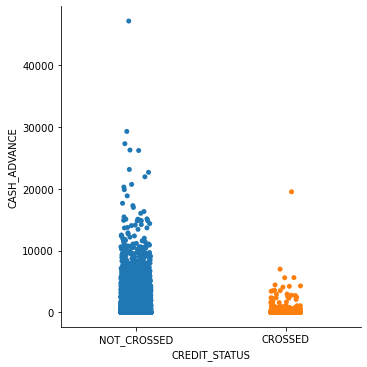

In [100]:
sns.catplot(x="CREDIT_STATUS", y="CASH_ADVANCE", data=cc1)

In [ ]:
# most people whp have cash advance do not cross credit limit.

### taking cash advance is not a sign of crossing.

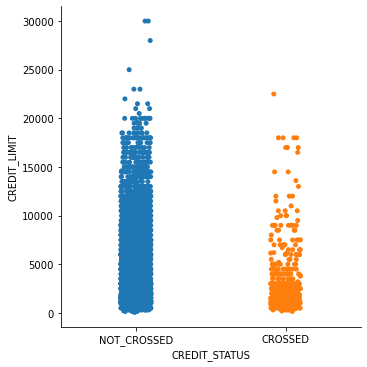

In [101]:
sns.catplot(x="CREDIT_STATUS", y="CREDIT_LIMIT", data=cc1)

In [ ]:
# people with credit limit bw 0-5k have mostly crossed.

##### BUSINESS INFERENCE
 - Significant peple from 0-15k have made the payments, there is significant decrease in 15-20k 
   and the least in 20-30k
 - taking cash advance is not a sign of crossing. 
 - look out for customers with purchases from 0-10k as they tend to go over limit
 - people with credit limit bw 0-10k, and tenure of 12 months, are more comfortable in paying       regularly
 - people with credit limit bw 0-5k have mostly crossed.